<a href="https://colab.research.google.com/github/musinaa/EDA_data_cleaning/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SECTION 1
READING DATA

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. What kind of questions are we trying to answer with this dataset?
a. Perform data cleaning to identify null values.
b. To prepare the dataset for calculating the CLTV.
c. Provide data visualization for the target variables to identify any relationship of the spread of data points.
d. Feature selection for data points that will be used for data analysis (calculation of CLTV).

2. What is the aim of the dataset? To identify the value of the company by comparing the behavior of all customers in the organization and considering the buying habits of a single customer.
3. What is the target variables? CustomerID, TotalCharges, Contract,MonthlyCharges, Tenure and Churn.


In [4]:
df= pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### SECTION 2
DATA PREPARATION AND CLEANING

In [10]:
# let's view the sahape of the data using shape function
df.shape

(7043, 21)

In [11]:
# The info() method prints information about the DataFrame. In this case, we shall use it to identify data types of our variables.
#The information contains the number of columns, column labels, column data types, memory usage, and range index
# Also, it has the number of cells in each column (non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       6953 non-null   object 
 13  StreamingTV       6953 non-null   object 
 14  StreamingMovies   6953 non-null   object 
 15  Contract          6953 non-null   object 
 16  PaperlessBilling  6953 non-null   object 


Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (7043). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. Also, mwe will consider changing the variable "TotalCharges" into float value since it has data type object.

In [12]:
# We shall use isnull().sum() to identify the total number of null values for each variable.
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport         90
StreamingTV         90
StreamingMovies     90
Contract            90
PaperlessBilling    90
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

From above, we have five variables which have 90 missing values each. Before we continue, we will change varaible "TotalCharges" to numeric. To make our analysis easier, let's convert "TotalCharges" into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN

In [13]:
# Therefore, pd.to_numeric will be used to transform the entire colum of TotalCharges from object to numeric.
# kindly note that non-numeric values will be converted to Nan
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
# Let's check using info() whether the TotalCharges column are numeric or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       6953 non-null   object 
 13  StreamingTV       6953 non-null   object 
 14  StreamingMovies   6953 non-null   object 
 15  Contract          6953 non-null   object 
 16  PaperlessBilling  6953 non-null   object 


In this section, we shall be dealing with missing values. We can identify the values in the columns with missing values and replace the Nan with the mode/median. The mode function mostly applies in categorical values while median is preffered when the numeric values (continuous data) in a specific column is skewed towards left or right.

In [15]:
# Next we are going to identify TechSupport we the highest number of respondents using value_counts()
df['TechSupport'].value_counts()

No                     3427
Yes                    2014
No internet service    1512
Name: TechSupport, dtype: int64

We can identify "No" to have the most frequency compared to the other options. This implies that the mode of TechSupport is No.

In [16]:
# we shall be replacing the null values using fillna
# Also, we shall replace "No internet service" with "No" to remove redundant data.
df['TechSupport']=df['TechSupport'].fillna(df['TechSupport'].mode()[0])
df['TechSupport']=df['TechSupport'].replace("No internet service","No")
df['TechSupport'].value_counts()

No     5029
Yes    2014
Name: TechSupport, dtype: int64

Similarly, StreamingTv is another variable with missing values. The same approach applies by identifying the highest number of respondents and dealing with redudant values. The mode will apply for filling the missing values.

In [17]:
# let's identify the highest values in StreamingTV by using value_counts()
df['StreamingTV'].value_counts()

No                     2772
Yes                    2669
No internet service    1512
Name: StreamingTV, dtype: int64

In [18]:
# fill the missing values using "No" (the mode)
# Replace "No internet service" by "No" to remove redundant features.
df['StreamingTV']=df['StreamingTV'].fillna(df['StreamingTV'].mode()[0])
df['StreamingTV']=df['StreamingTV'].replace("No internet service","No")
df['StreamingTV'].value_counts()

No     4374
Yes    2669
Name: StreamingTV, dtype: int64

We can identify the values in StreamingMovies and replace the Nan with the mode. Also, redundant values will be identified and replaced.

In [19]:
# Let's identify the highest values in StreamingMovies by using value_counts()
df['StreamingMovies'].value_counts()

No                     2754
Yes                    2687
No internet service    1512
Name: StreamingMovies, dtype: int64

In [20]:
#Fillna() and replace() will be used to fill null values with mode and to remove redudant values respectively
df['StreamingMovies']=df['StreamingMovies'].fillna(df['StreamingMovies'].mode()[0])
df['StreamingMovies']=df['StreamingMovies'].replace("No internet service","No")
df['StreamingMovies'].value_counts()

No     4356
Yes    2687
Name: StreamingMovies, dtype: int64

In this subsection, We can identify the values in Contract column and replace the Nan with the mode. 

In [21]:
# Let's identify the highest values in Contract using value_counts()
df['Contract'].value_counts()

Month-to-month    3820
Two year          1675
One year          1458
Name: Contract, dtype: int64

In [22]:
#Fillna() will be used to fill null values with mode.
df['Contract']=df['Contract'].fillna(df['Contract'].mode()[0])

PaperlessBilling is another variable with null value. We can identify the mode and use it to fill the missing values within the variable.

In [23]:
# we can identify the highest value/mode using value_counts() in the PaperlessBilling column
df['PaperlessBilling'].value_counts()

Yes    4117
No     2836
Name: PaperlessBilling, dtype: int64

In [24]:
# we can identify the highest value/mode using value_counts() in the PaperlessBilling column
df['PaperlessBilling'].value_counts()

Yes    4117
No     2836
Name: PaperlessBilling, dtype: int64

In [25]:
#finally, lets check missing values in all the variables to ensure we have zero null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling    90
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

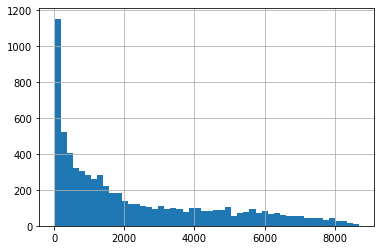

In [30]:
# it appears we have null values on the "TotalCharges" column.
# The null values was generated after filling the object data type with float data type in our previous steps.
# To replcae the null values, we shall use hist() to identify the distribution of the TotalCharges using percentiles
df["TotalCharges"].hist(bins=50)

In [27]:
# since "TotalCharges" is a float data type, we shall determine median using median()
df['TotalCharges'].median()

1397.475

In [28]:
# Proceed to fill the null values using median(). 
# Filling null values with median is preffered when the numeric values (continuous data) in a specific column is skewed towards left or right
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [29]:
# check for any null values using isnull().sum()
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling    90
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [31]:
# let's view our summary statistics for our numeric data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### SECTION 3
EXPLORATORY DATA ANALYSIS

                                             |          | [  0%]   00:00 -> (? left)


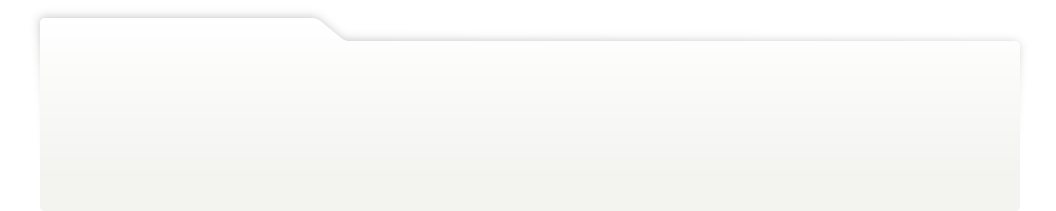
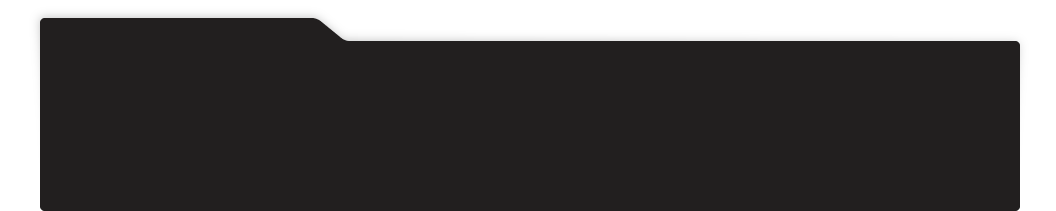
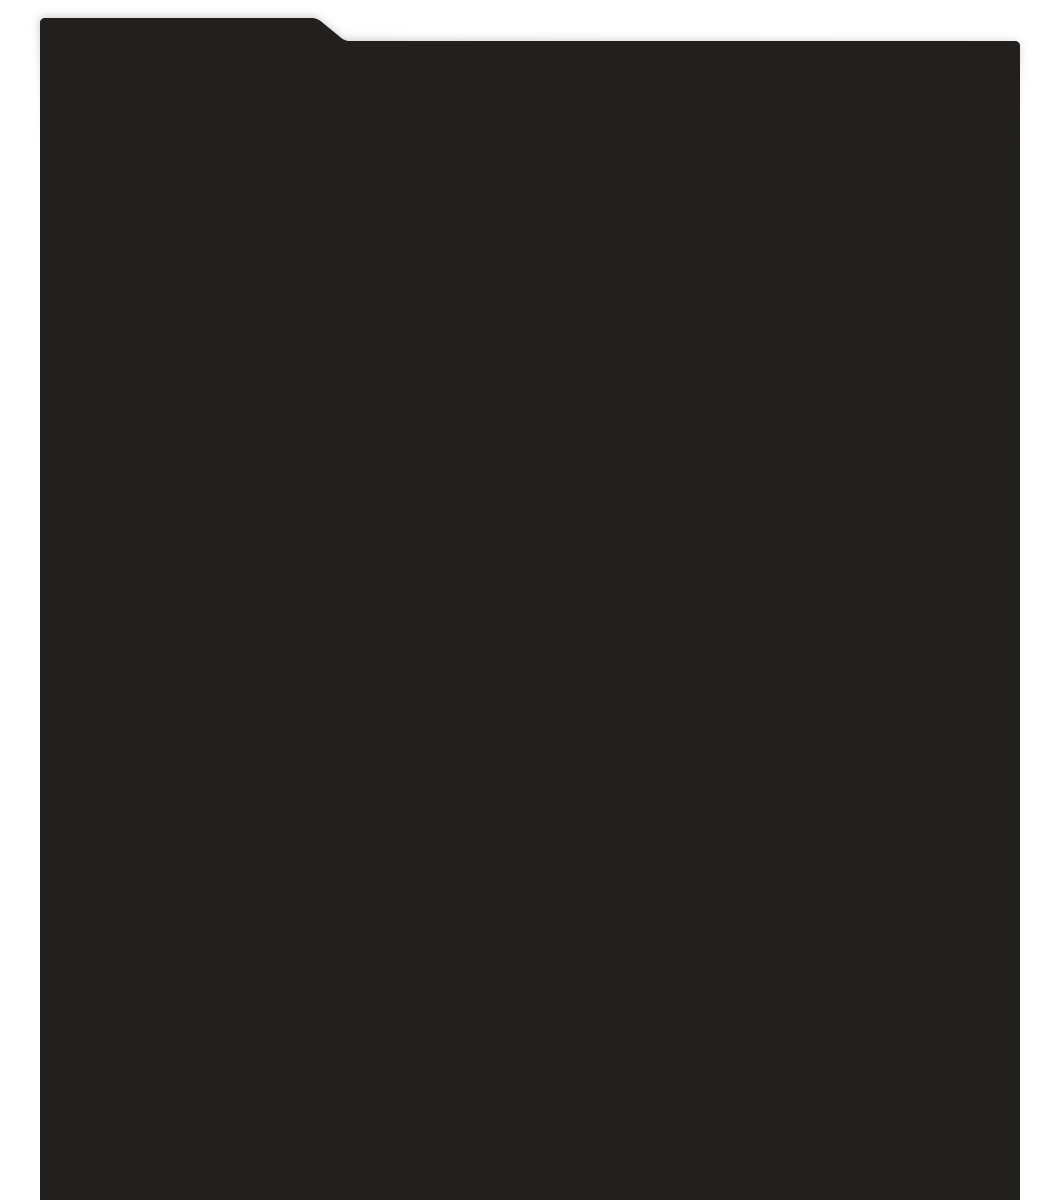
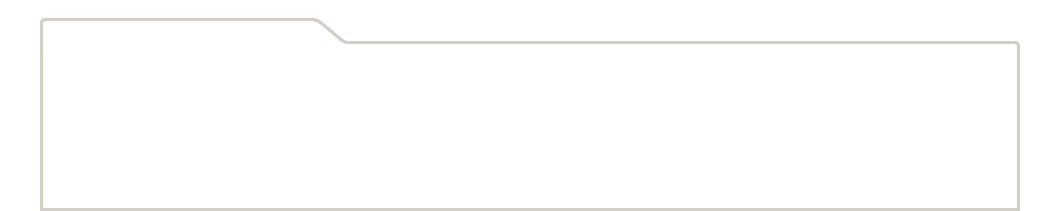
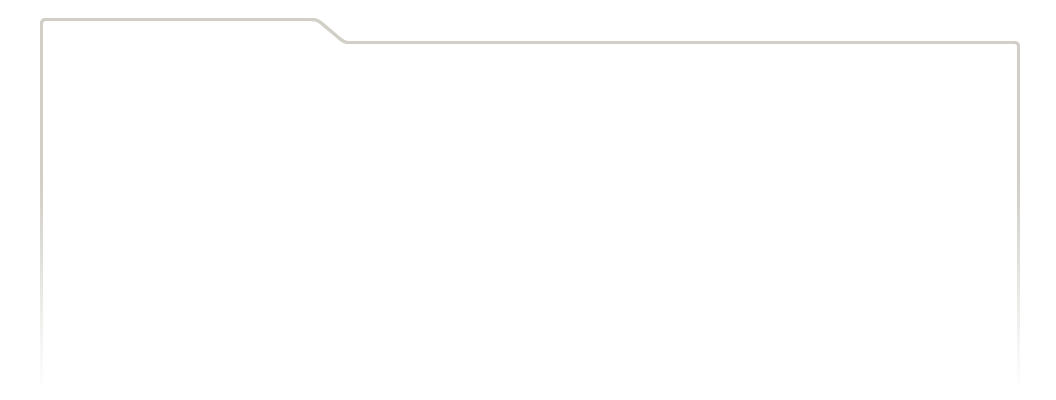
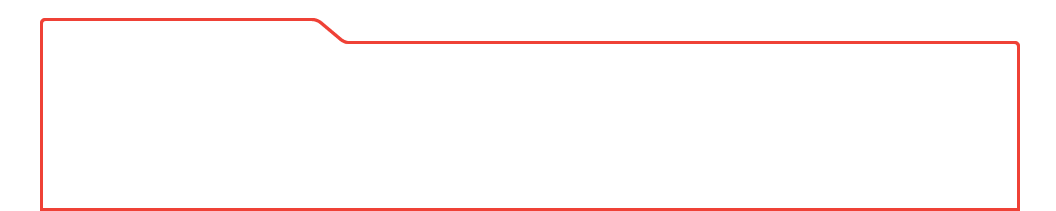
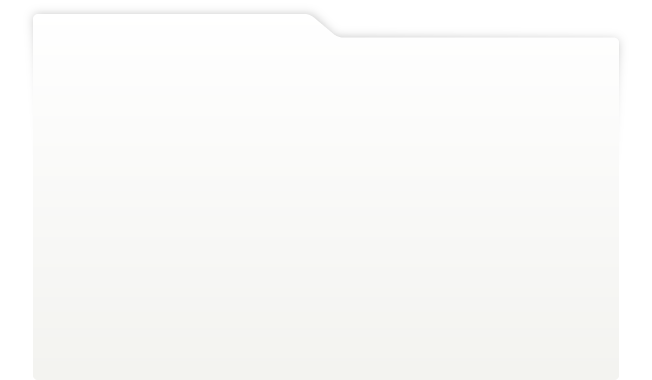
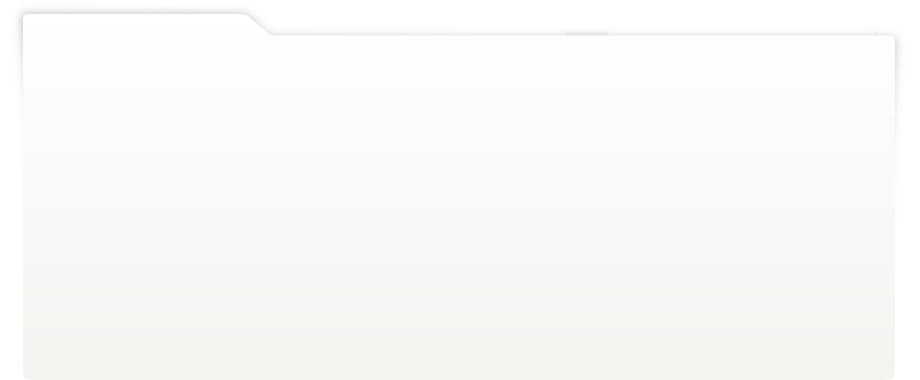
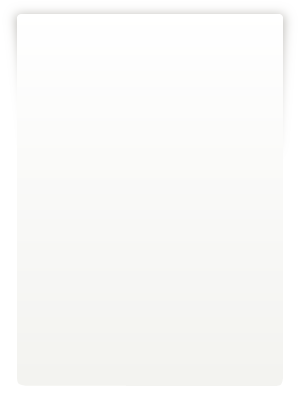
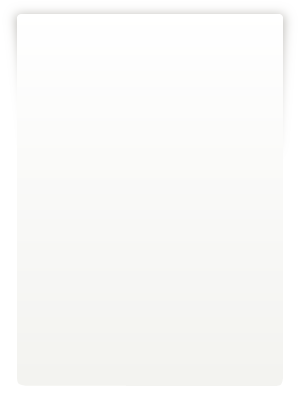
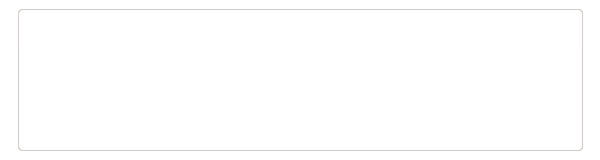
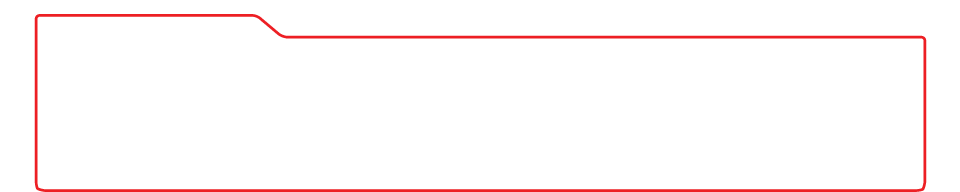
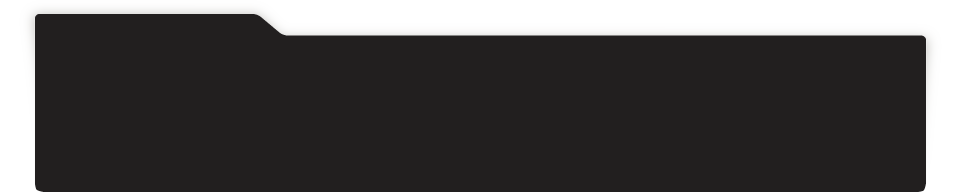
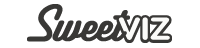
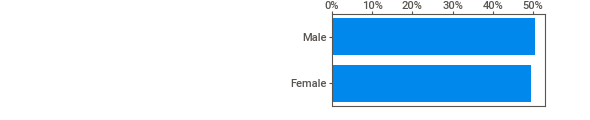
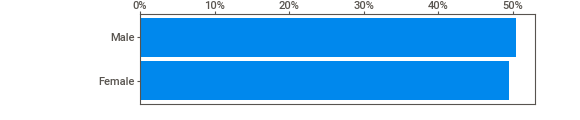
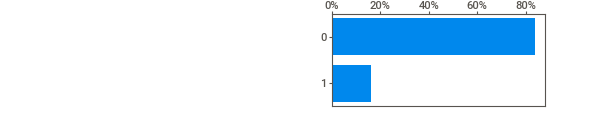
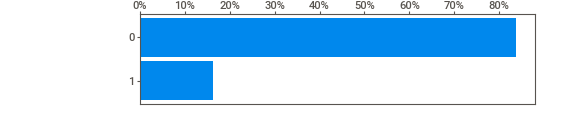
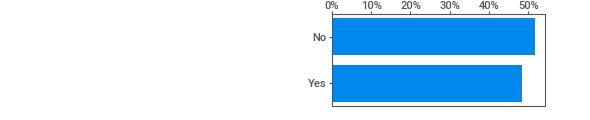
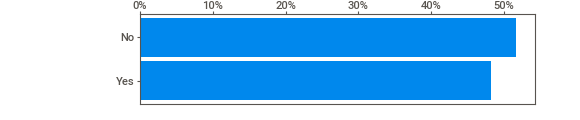
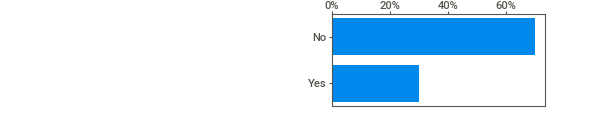
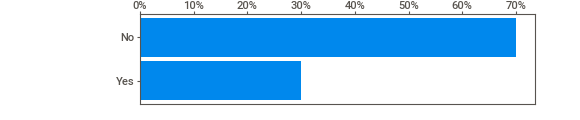
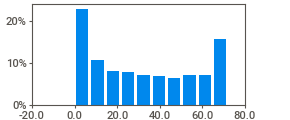
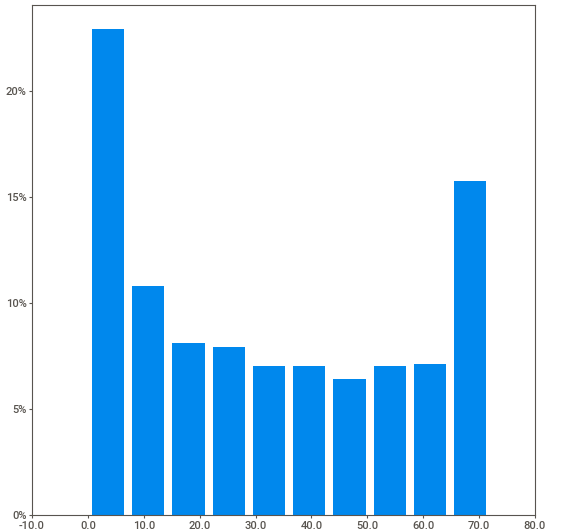
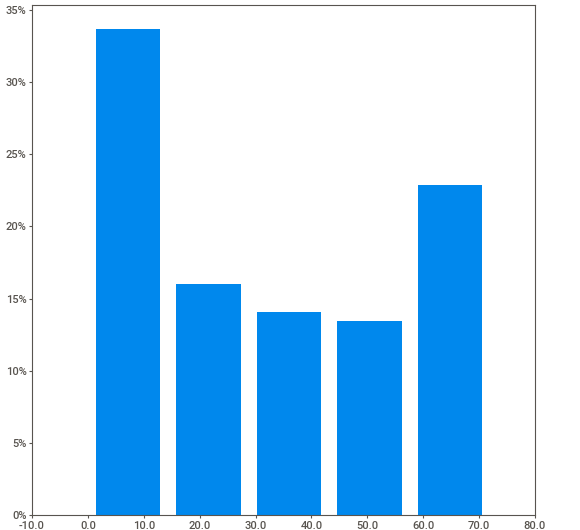
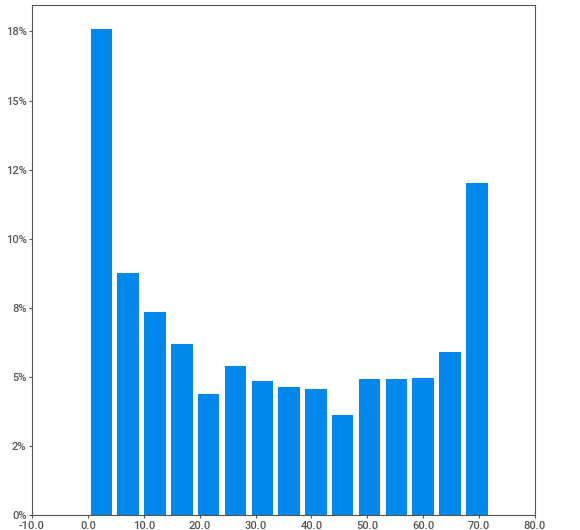
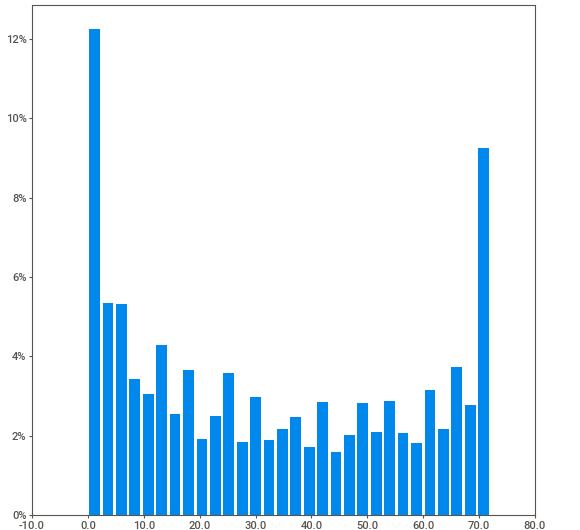
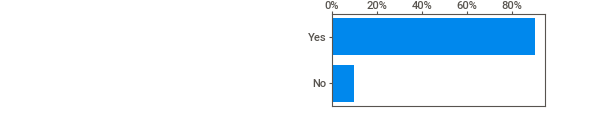
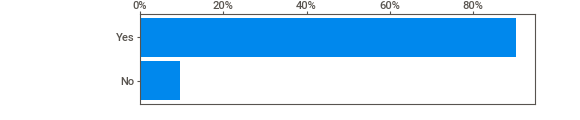
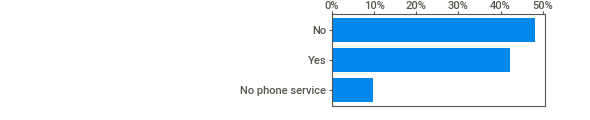
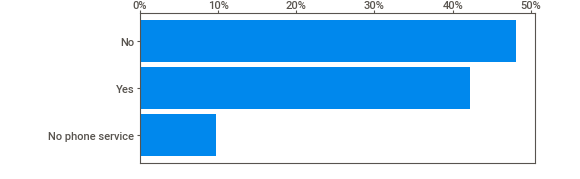
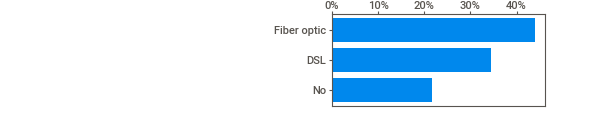
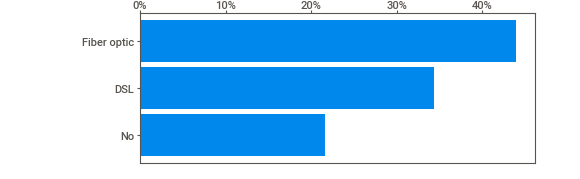
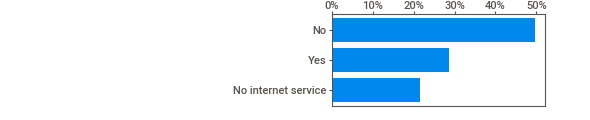
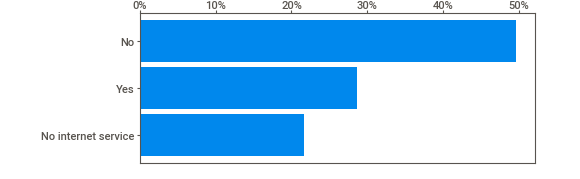
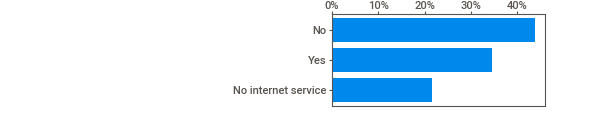
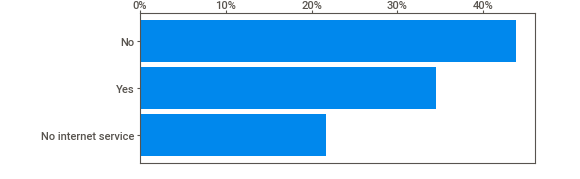
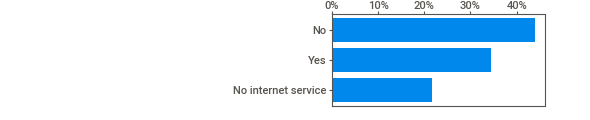
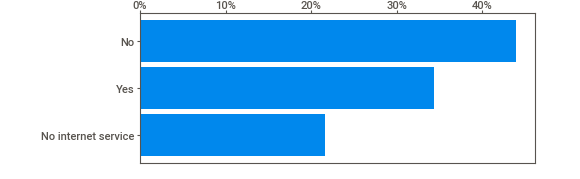
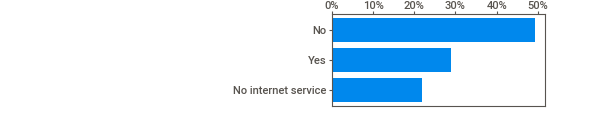
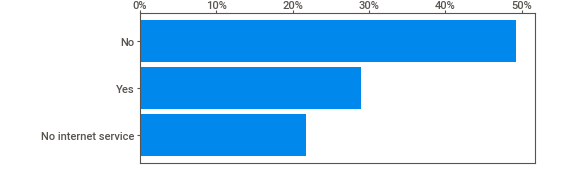
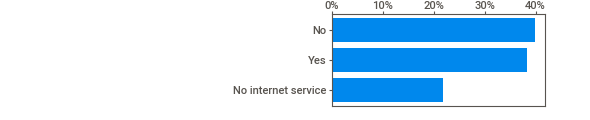
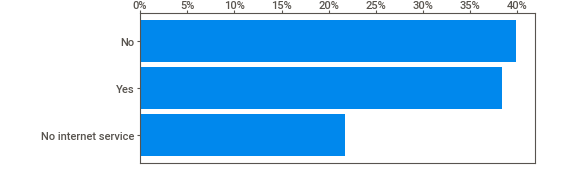
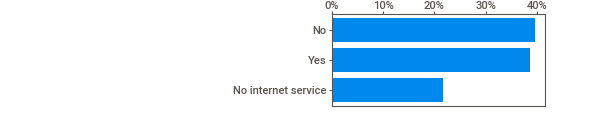
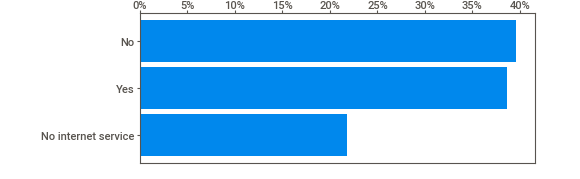
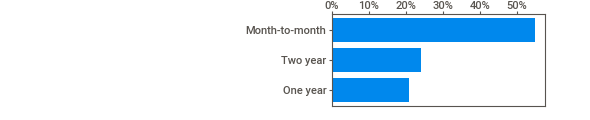
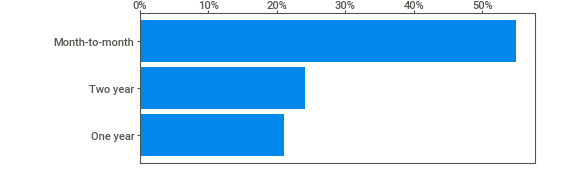
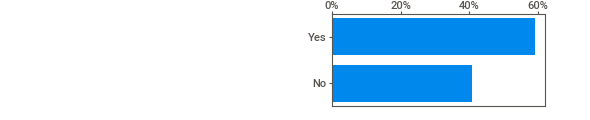
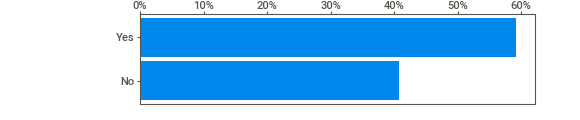
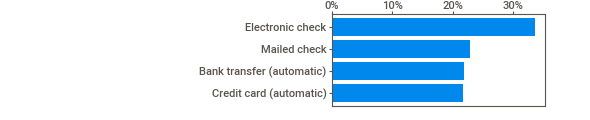
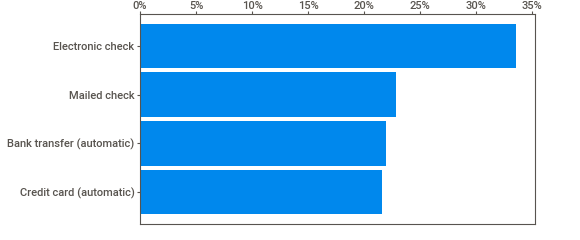
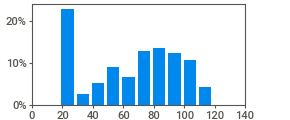
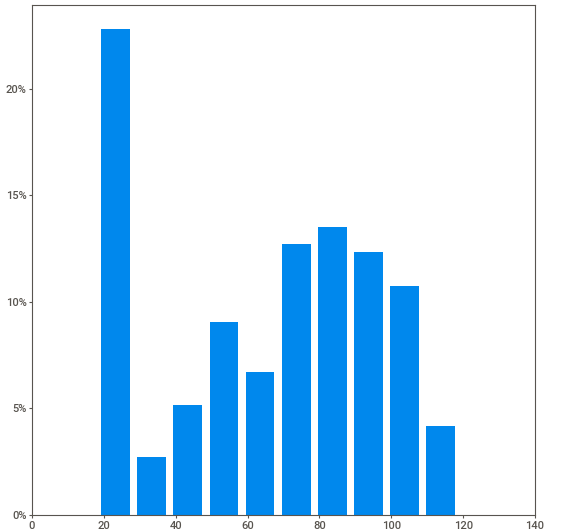
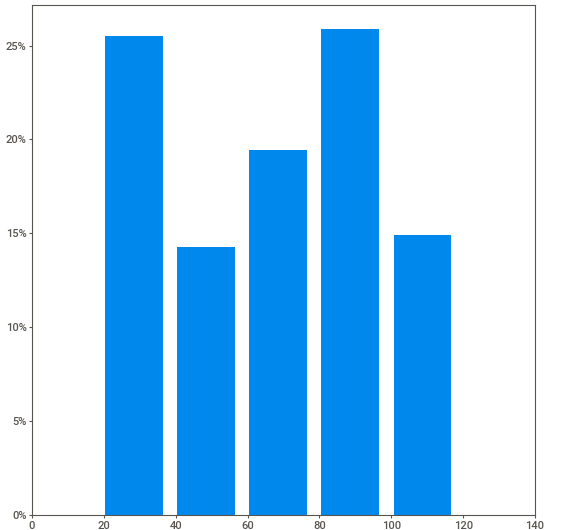
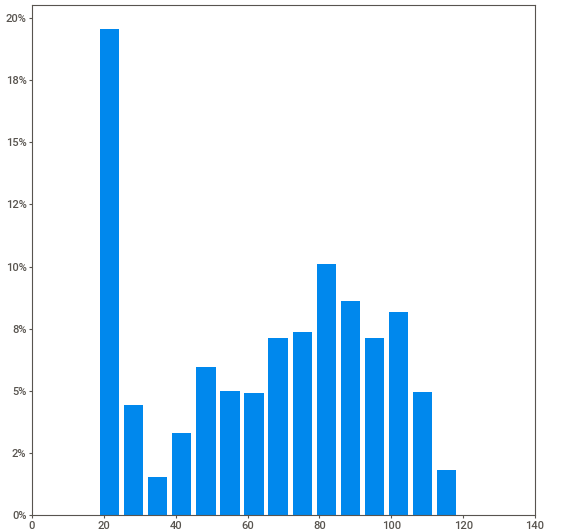
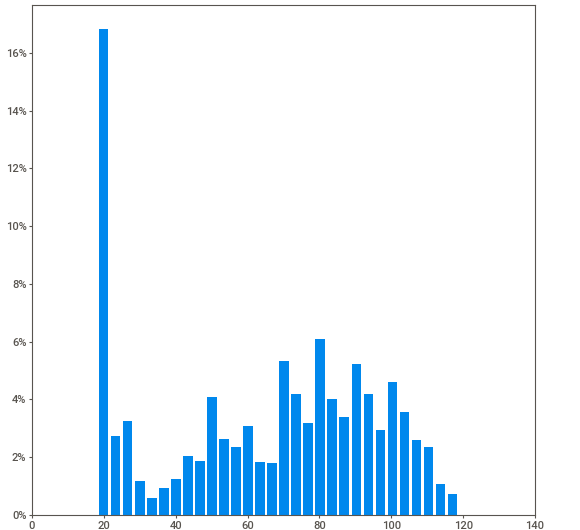
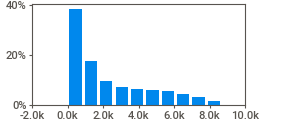
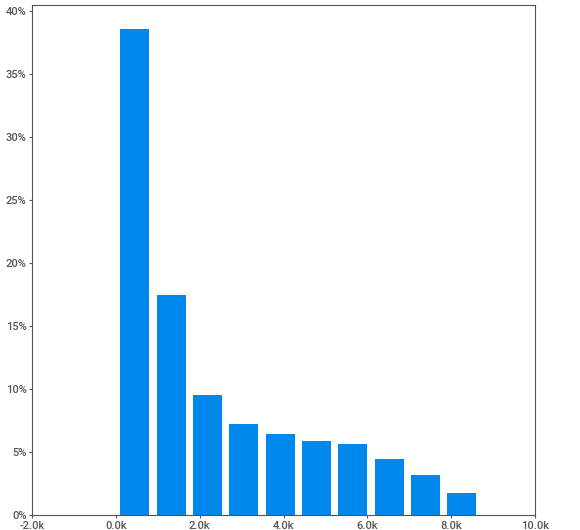
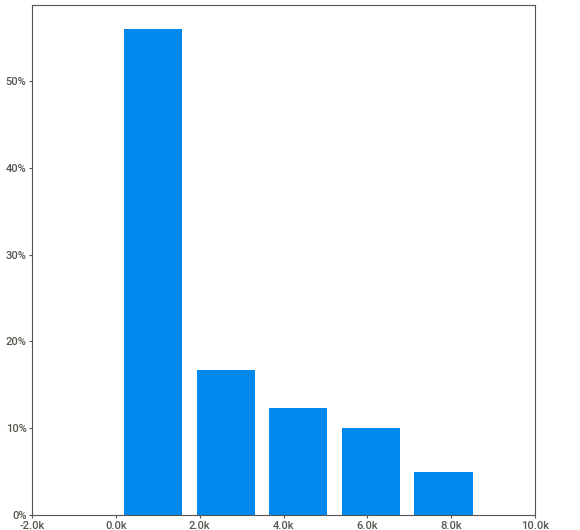
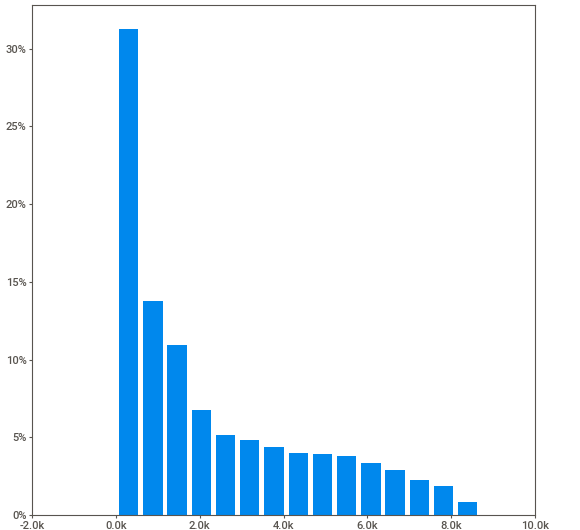
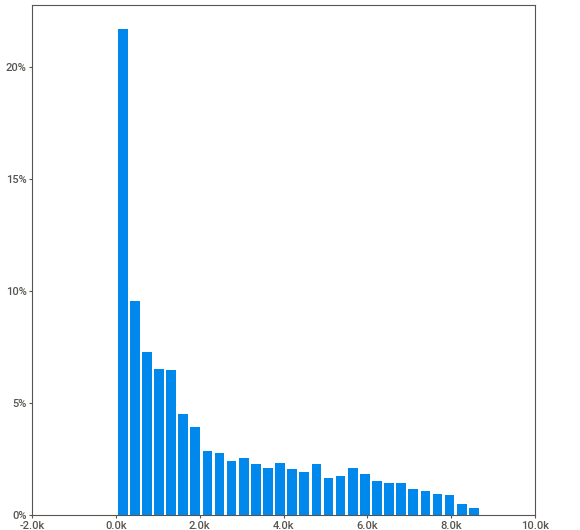
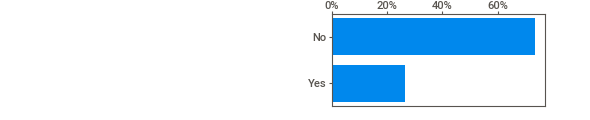
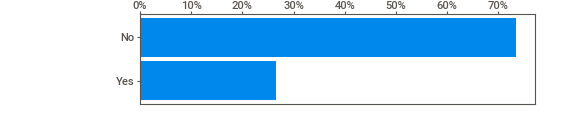
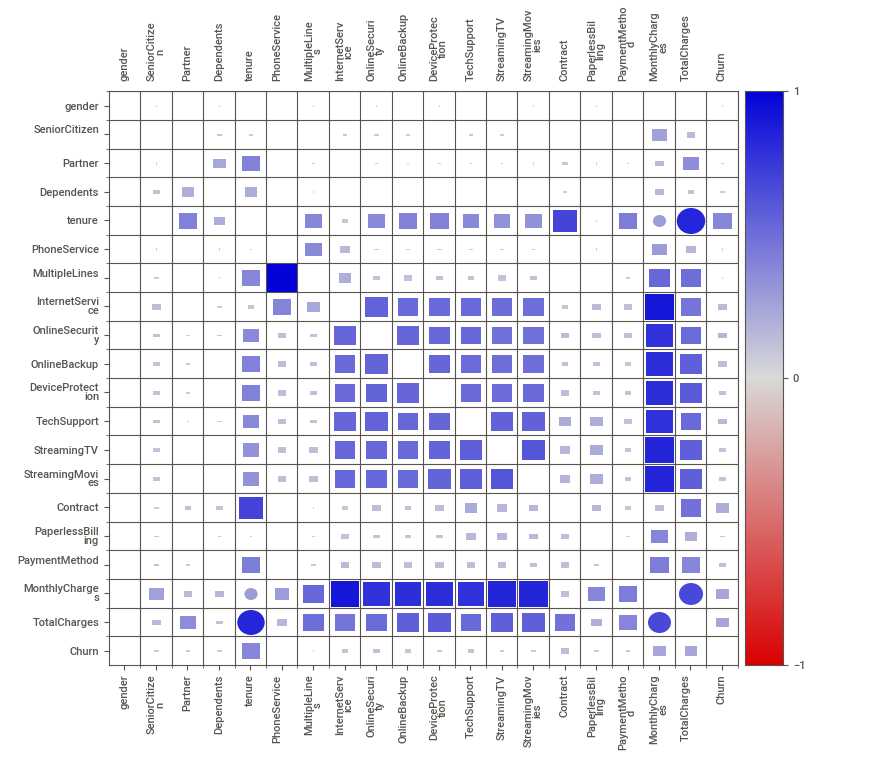
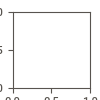

In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(telco_customer_churn)
analyze_report.show_notebook()

Shape of your Data Set loaded: (7043, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  6
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    21 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
All Plots done
Time to run AutoViz = 2 seconds 

 ######################

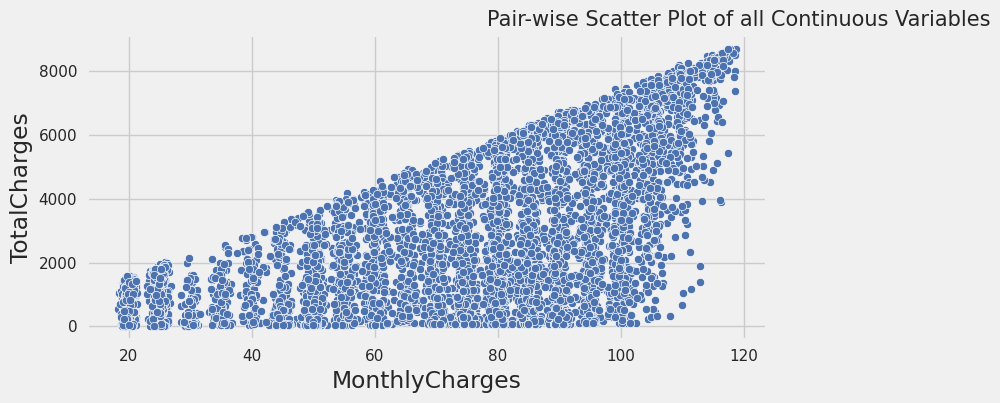

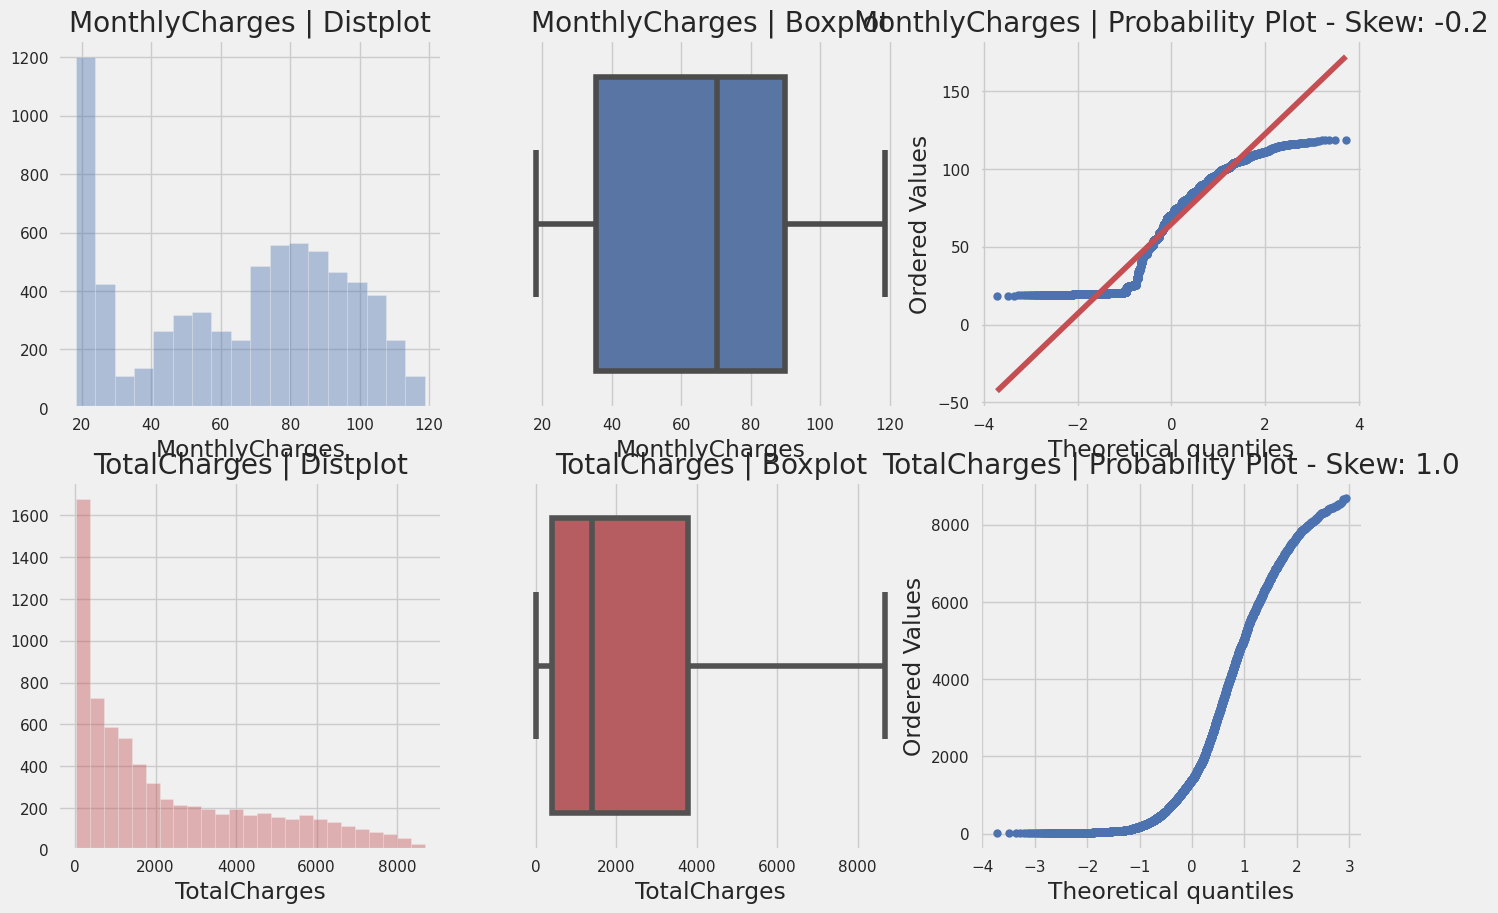

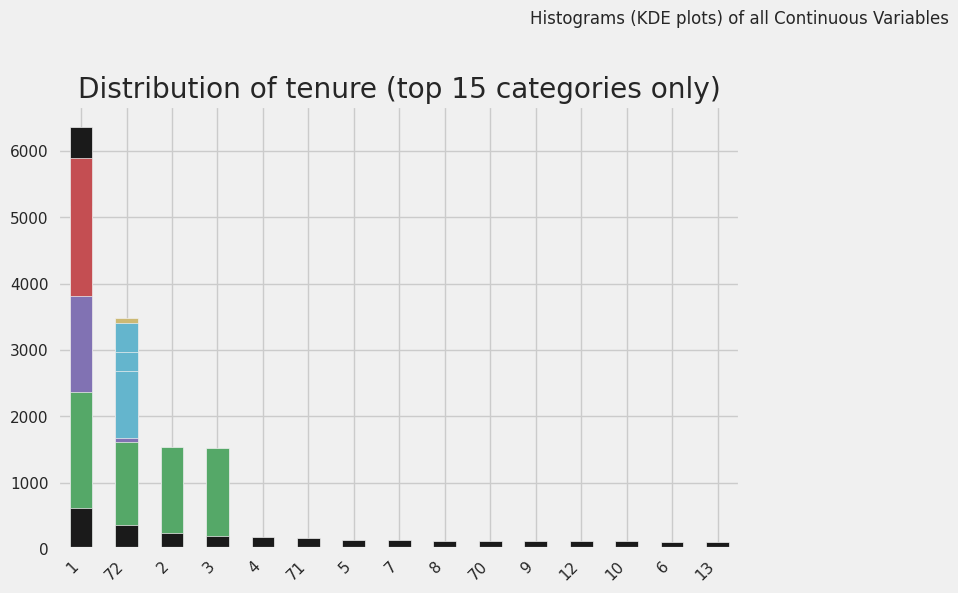

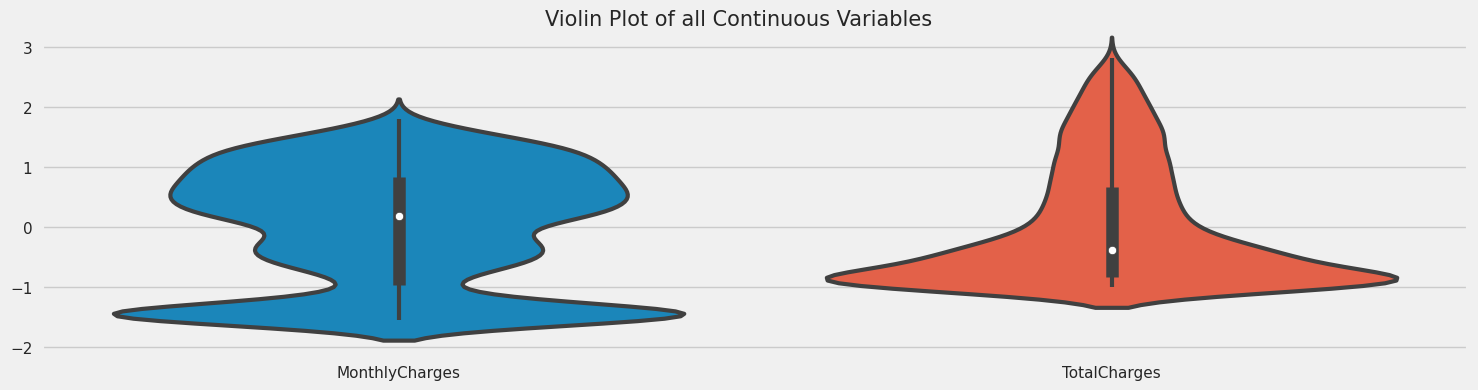

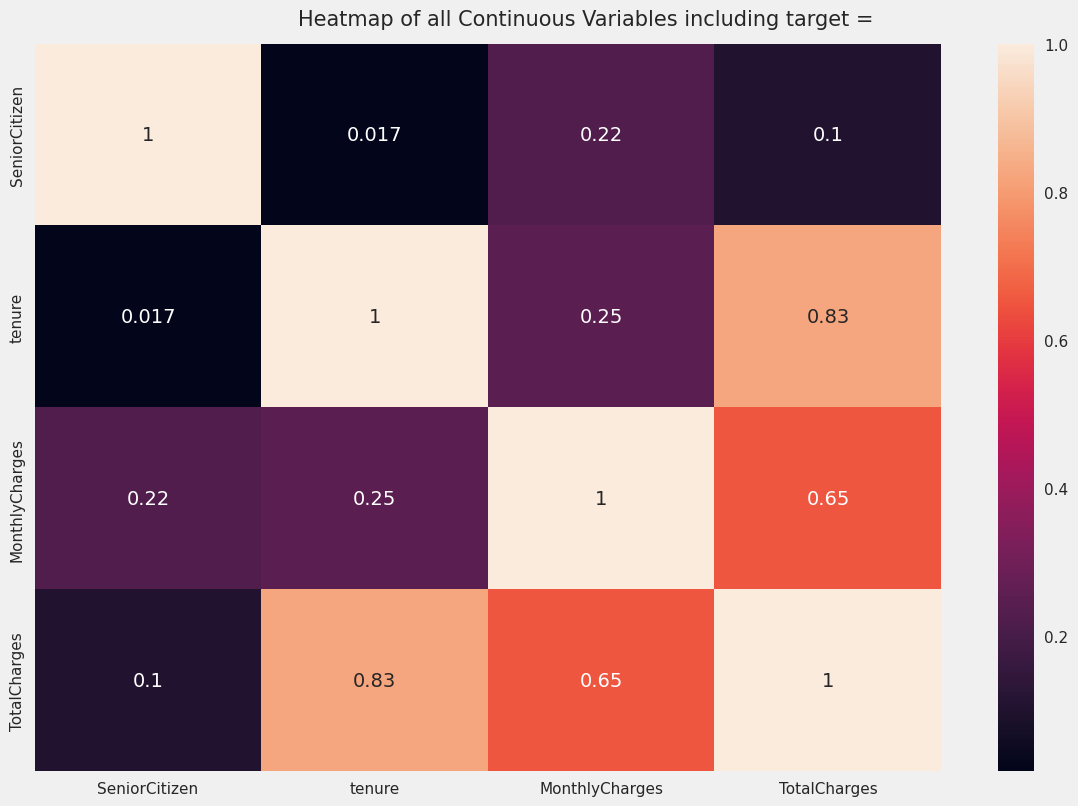

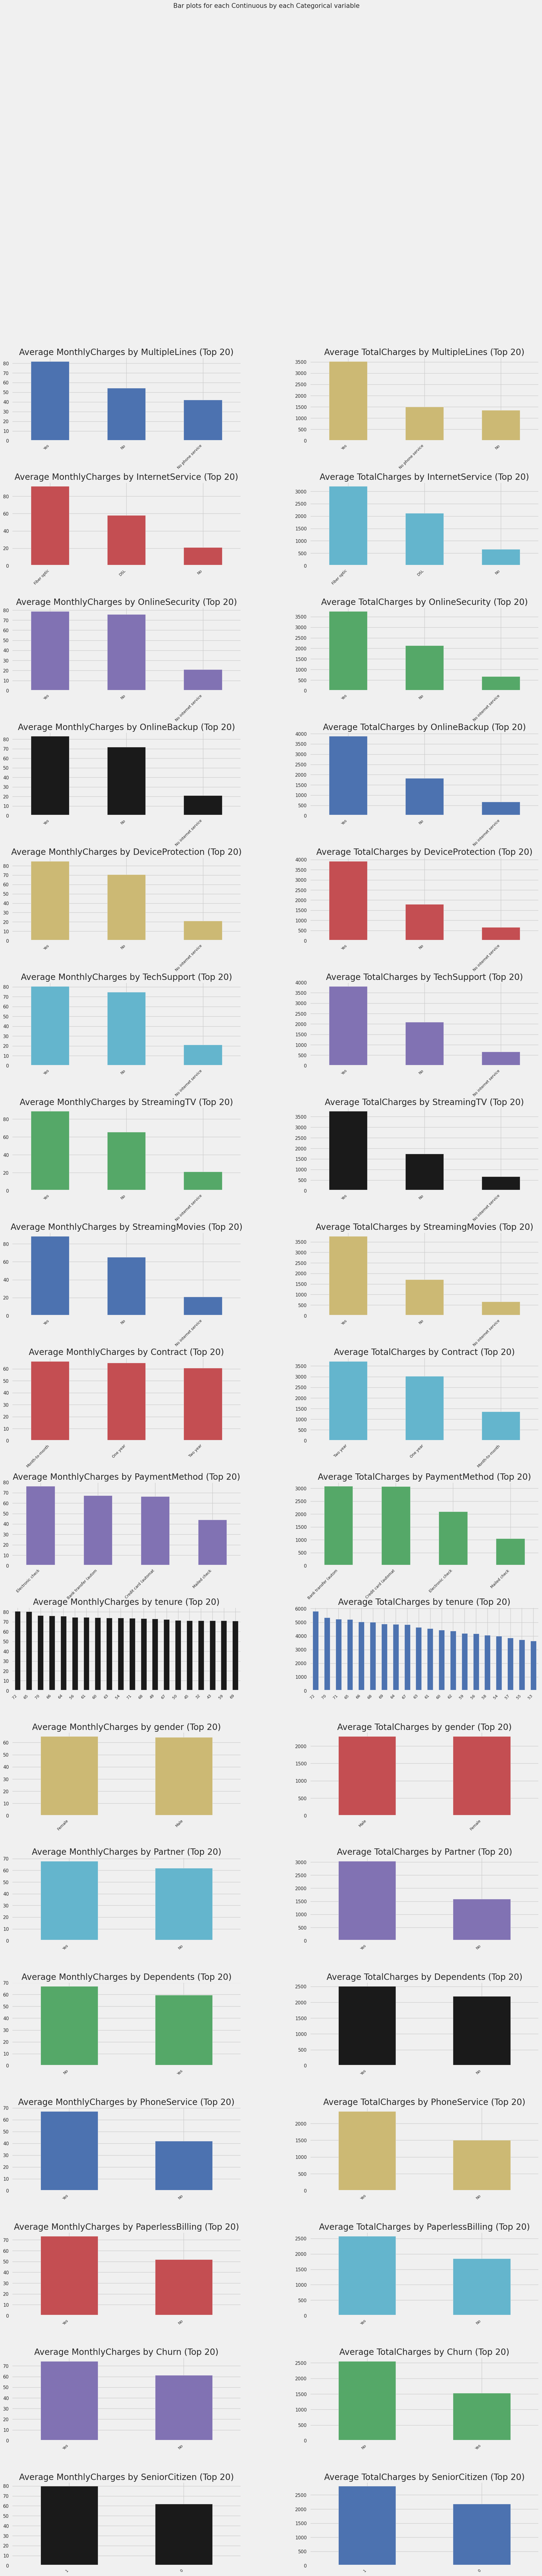

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('', dfte=telco_customer_churn)

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport('Telco-Customer-Churn.csv')

AttributeError: ignored